In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import json
import pickle

In [ ]:
# Problem Statement:
  x=  ['Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
    y='Life expectancy '    

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [3]:
# Data Gathering:
    
df=pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
# EDA:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
# 3.1 Country
df["Country"].nunique()

193

In [7]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [8]:
# 3.3: Status
# Dtype=Objetc So Label Encoding
df["Status"].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

<AxesSubplot:xlabel='Life expectancy ', ylabel='Density'>

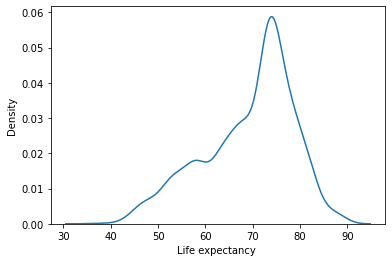

In [9]:
# 3.4 Life expectancy
sns.kdeplot(df["Life expectancy "])
# find Median/mode/mean

<AxesSubplot:xlabel='Adult Mortality', ylabel='Density'>

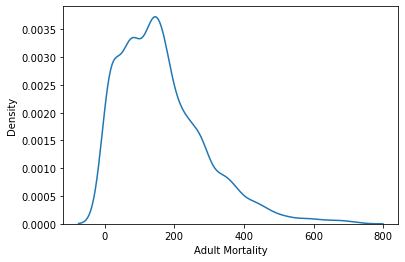

In [10]:
# 3.5  Adult Mortality
sns.kdeplot(df["Adult Mortality"])
# find Median/mode/mean

<AxesSubplot:xlabel='infant deaths', ylabel='Density'>

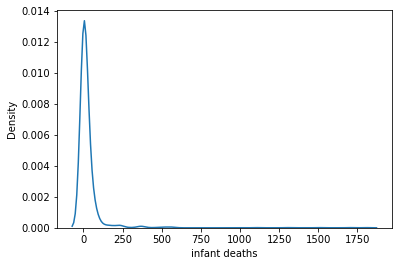

In [11]:
# 3.6 infant deaths
sns.kdeplot(df["infant deaths"])
# find Mean,Mode,Median

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

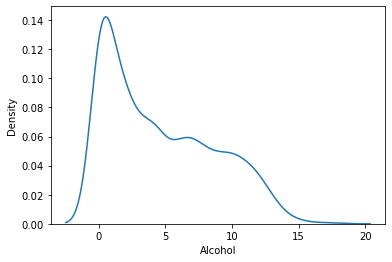

In [12]:
# 3.7 Alcohol
sns.kdeplot(df["Alcohol"])
# find Median

<AxesSubplot:xlabel='percentage expenditure', ylabel='Density'>

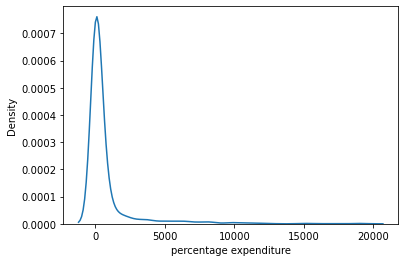

In [13]:
# 3.8 'percentage expenditure'
sns.kdeplot(df['percentage expenditure'])
# find Median

<AxesSubplot:xlabel='Hepatitis B', ylabel='Density'>

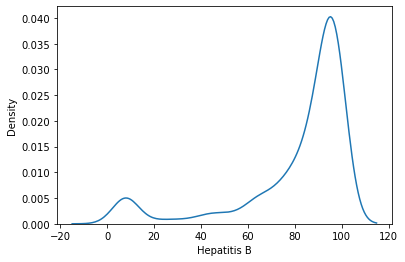

In [14]:
# 3.9 'Hepatitis B'
sns.kdeplot(df['Hepatitis B'])

<AxesSubplot:xlabel='Measles ', ylabel='Density'>

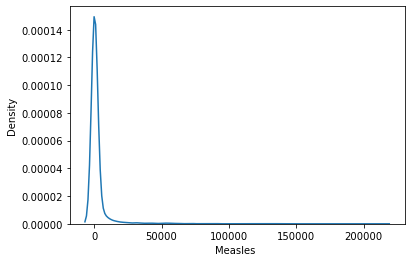

In [15]:
# 3.10 'Measles '
sns.kdeplot(df['Measles '])

<AxesSubplot:xlabel=' BMI ', ylabel='Density'>

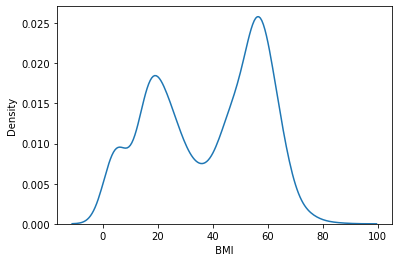

In [16]:
# 3.11 ' BMI '
sns.kdeplot(df[' BMI '])

<AxesSubplot:xlabel='under-five deaths ', ylabel='Density'>

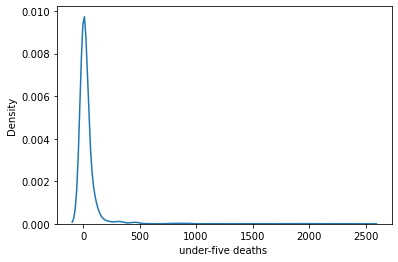

In [17]:
# 3.12 'under-five deaths '
sns.kdeplot(df['under-five deaths '])

<AxesSubplot:xlabel='Polio', ylabel='Density'>

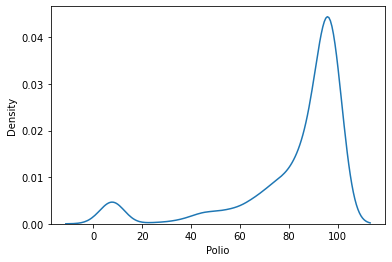

In [18]:
# 3.13  'Polio'
sns.kdeplot(df[ 'Polio'])

<AxesSubplot:xlabel='Total expenditure', ylabel='Density'>

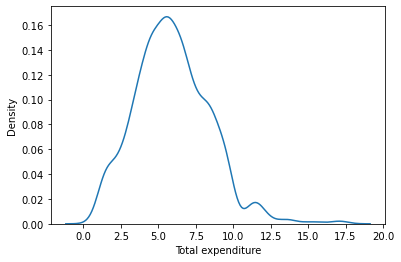

In [19]:
# 3.14 'Total expenditure'
sns.kdeplot(df['Total expenditure'])

<AxesSubplot:xlabel='Diphtheria ', ylabel='Density'>

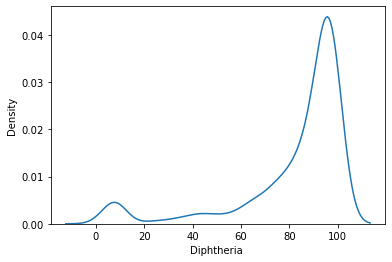

In [20]:
# 3.15 'Diphtheria '
sns.kdeplot(df['Diphtheria '])

<AxesSubplot:xlabel=' HIV/AIDS', ylabel='Density'>

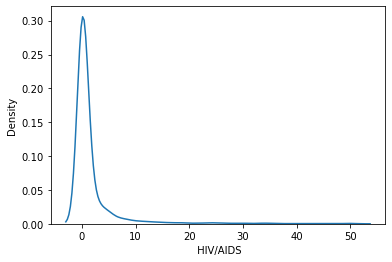

In [21]:
# 3.16 ' HIV/AIDS'
sns.kdeplot(df[' HIV/AIDS'])

<AxesSubplot:xlabel='GDP', ylabel='Density'>

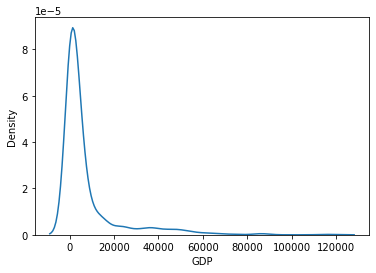

In [22]:
# 3.17 'GDP'
sns.kdeplot(df['GDP'])

<AxesSubplot:xlabel='Population', ylabel='Density'>

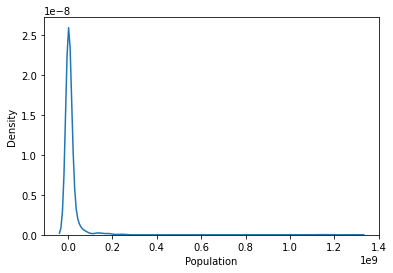

In [23]:
#3.18 'Population'
sns.kdeplot(df['Population'])

<AxesSubplot:xlabel=' thinness  1-19 years', ylabel='Density'>

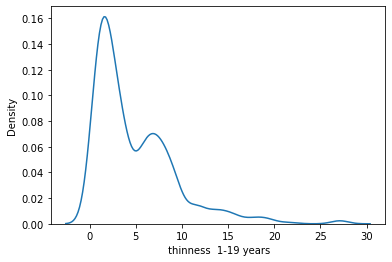

In [24]:
# 3.19 ' thinness  1-19 years'
sns.kdeplot(df[' thinness  1-19 years'])

<AxesSubplot:xlabel='Income composition of resources', ylabel='Density'>

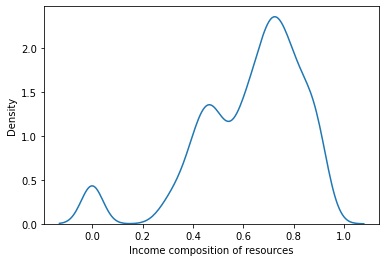

In [25]:
# 3.20 'Income composition of resources'
sns.kdeplot(df['Income composition of resources'])

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

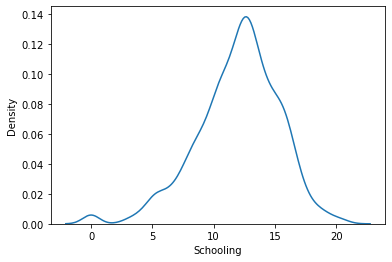

In [26]:
# 3.21 'Schooling'
sns.kdeplot(df['Schooling'])

In [27]:
# Feature Engineering

In [28]:
# 4.1 Country

In [29]:
df.Country.dtype
#dependacy on output is less so it will skip

dtype('O')

<AxesSubplot:xlabel='Year', ylabel='Density'>

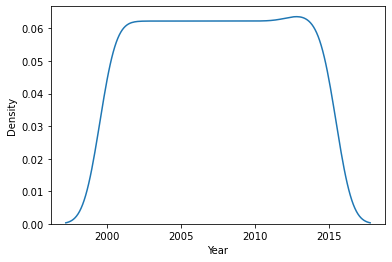

In [30]:
# 4.2 'Year'
sns.kdeplot(df["Year"])

In [31]:
# 4.3 Status
df["Status"].replace({"Developing":0,"Developed":1},inplace=True)

<AxesSubplot:xlabel='Status', ylabel='Density'>

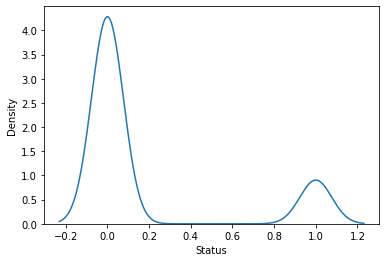

In [32]:
sns.kdeplot(df["Status"])

In [33]:
# 4.4 'Life expectancy '
df['Life expectancy '].fillna(df['Life expectancy '].median(),inplace=True)
df['Life expectancy '] = df['Life expectancy '].astype(int)

<AxesSubplot:xlabel='Life expectancy ', ylabel='Density'>

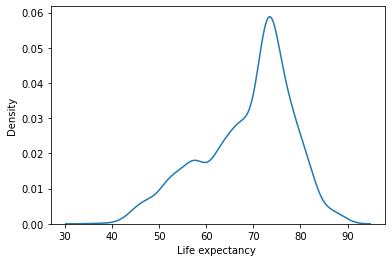

In [34]:
sns.kdeplot(df['Life expectancy '])

In [35]:
# 4.5 'Adult Mortality'
df['Adult Mortality'].fillna(df['Adult Mortality'].median(),inplace=True)
df['Adult Mortality']=df['Adult Mortality'].astype(int)

<AxesSubplot:xlabel='Adult Mortality', ylabel='Density'>

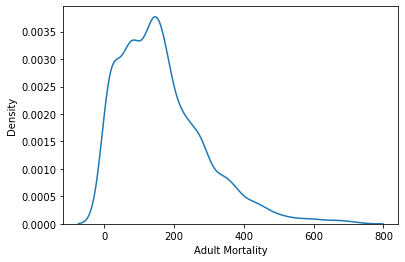

In [36]:
sns.kdeplot(df['Adult Mortality'])

<AxesSubplot:xlabel='infant deaths', ylabel='Density'>

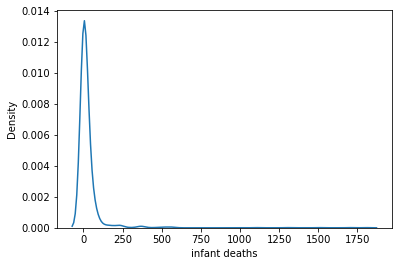

In [37]:
# 4.6 'infant deaths'
sns.kdeplot(df["infant deaths"])

In [38]:
# 4.7 'Alcohol'
df['Alcohol'].fillna(df['Alcohol'].median(),inplace=True)
df['Alcohol']=df['Alcohol'].astype(int)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

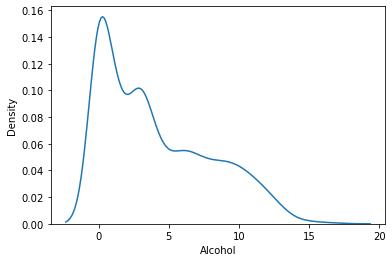

In [39]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='percentage expenditure', ylabel='Density'>

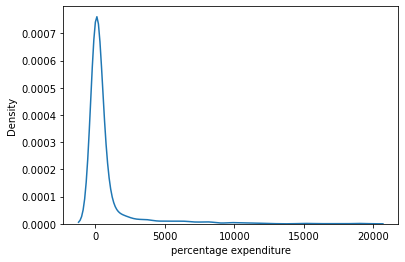

In [40]:
# 4.8 percentage expenditure
df['percentage expenditure']=df['percentage expenditure'].astype(int)
sns.kdeplot(df['percentage expenditure'])

In [41]:
# 4.9 Hepatitis B

<AxesSubplot:xlabel='Hepatitis B', ylabel='Density'>

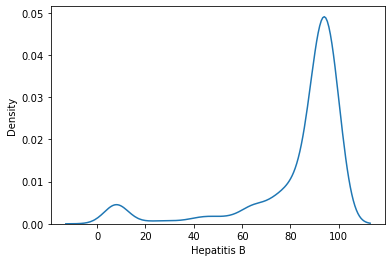

In [42]:
df['Hepatitis B'].fillna(df['Hepatitis B'].median(),inplace=True)
df['Hepatitis B']=df['Hepatitis B'].astype(int)
sns.kdeplot(df['Hepatitis B'])

<AxesSubplot:xlabel='Measles ', ylabel='Density'>

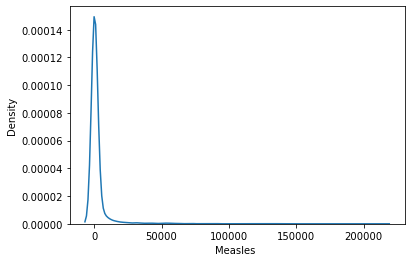

In [43]:
# 4.10 'Measles '
sns.kdeplot(df['Measles '])

<AxesSubplot:xlabel=' BMI ', ylabel='Density'>

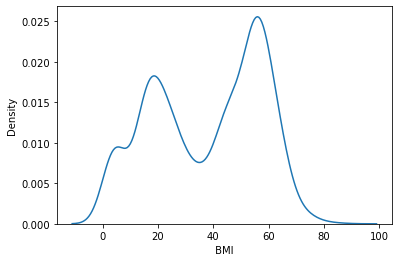

In [44]:
# 4.11 BMI
df[ ' BMI '].fillna(df[ ' BMI '].median(),inplace=True)
df[ ' BMI ']=df[ ' BMI '].astype(int)
sns.kdeplot(df[ ' BMI '])

<AxesSubplot:xlabel='under-five deaths ', ylabel='Density'>

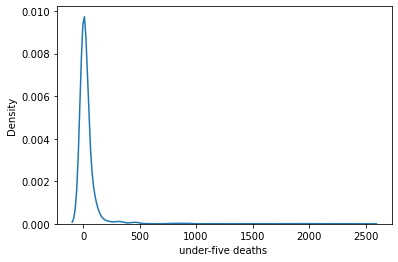

In [45]:
# 4.12 'under-five deaths '
sns.kdeplot(df['under-five deaths '])

<AxesSubplot:xlabel='Polio', ylabel='Density'>

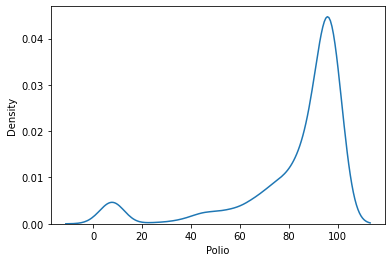

In [46]:
# 4.13 polio
df['Polio'].fillna(df['Polio'].median(),inplace=True)
df['Polio']=df['Polio'].astype(int)
sns.kdeplot(df['Polio'])

<AxesSubplot:xlabel='Total expenditure', ylabel='Density'>

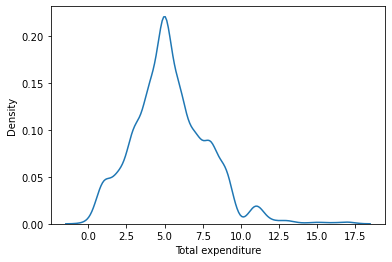

In [47]:
# 4.14 'Total expenditure'
df['Total expenditure'].fillna(df['Total expenditure'].median(),inplace=True)
df['Total expenditure']=df['Total expenditure'].astype(int)
sns.kdeplot(df['Total expenditure'])

<AxesSubplot:xlabel='Diphtheria ', ylabel='Density'>

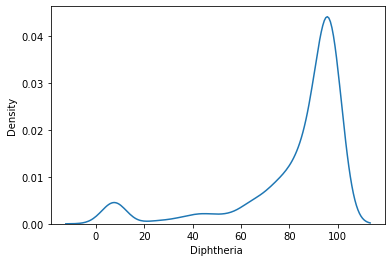

In [48]:
# 4.15 'Diphtheria '
df[ 'Diphtheria '].fillna(df['Diphtheria '].median(),inplace=True)
df[ 'Diphtheria ']=df[ 'Diphtheria '].astype(int)
sns.kdeplot(df['Diphtheria '])

<AxesSubplot:xlabel=' HIV/AIDS', ylabel='Density'>

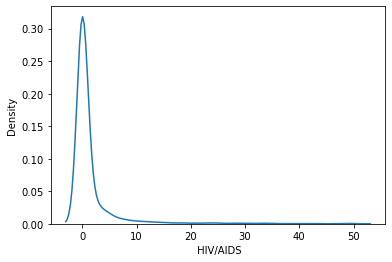

In [49]:
# 4.16' HIV/AIDS'
df[' HIV/AIDS']=df[' HIV/AIDS'].astype(int)
sns.kdeplot(df[' HIV/AIDS'])

<AxesSubplot:xlabel='GDP', ylabel='Density'>

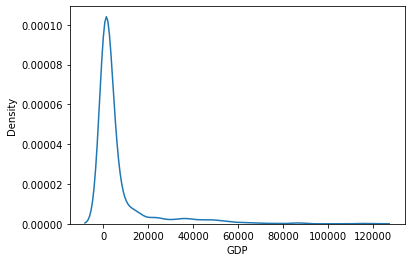

In [50]:
# 4.17 'GDP'
df['GDP'].fillna(df['GDP'].median(),inplace=True)
df['GDP']=df['GDP'].astype(int)
sns.kdeplot(df['GDP'])

<AxesSubplot:xlabel='Population', ylabel='Density'>

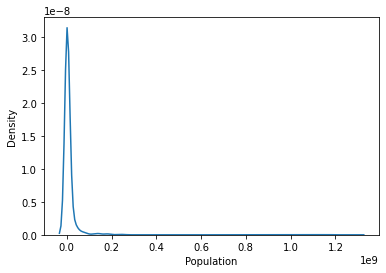

In [51]:
# 4.18 'Population'
df['Population'].fillna(df['Population'].median(),inplace=True)
df['Population']=df['Population'].astype(int)
sns.kdeplot(df['Population'])

<AxesSubplot:xlabel=' thinness  1-19 years', ylabel='Density'>

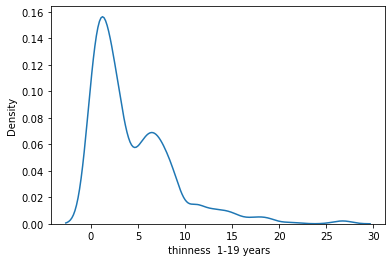

In [52]:
# 4.19 ' thinness  1-19 years'
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].median(),inplace=True)
df[' thinness  1-19 years']=df[' thinness  1-19 years'].astype(int)
sns.kdeplot(df[' thinness  1-19 years'])

<AxesSubplot:xlabel=' thinness 5-9 years', ylabel='Density'>

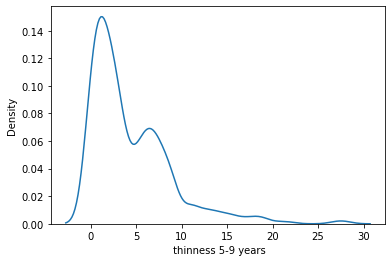

In [53]:
# 4.20 ' thinness 5-9 years'
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].median(),inplace=True)
df[' thinness 5-9 years']=df[' thinness 5-9 years'].astype(int)
sns.kdeplot(df[' thinness 5-9 years'])

<AxesSubplot:xlabel='Income composition of resources', ylabel='Density'>

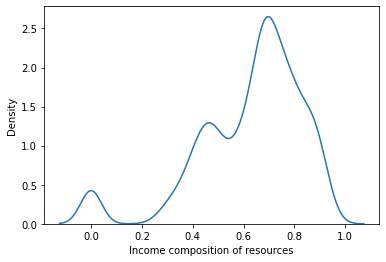

In [54]:
# 4.21 'Income composition of resources'
df['Income composition of resources'].fillna(df['Income composition of resources'].median(),inplace=True)
sns.kdeplot(df['Income composition of resources'])

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

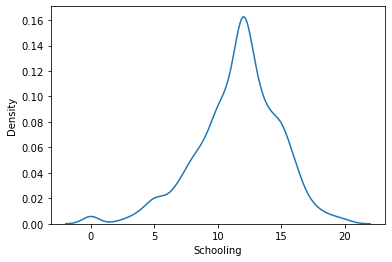

In [55]:
# 4.22 'Schooling'
df['Schooling'].fillna(df['Schooling'].median(),inplace=True)
df['Schooling']=df['Schooling'].astype(int)
sns.kdeplot(df['Schooling'])

5. Feature Selection
selected Features = 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'

In [56]:
# 6.Model Training

In [57]:
x=df.drop(['Life expectancy ','Country','Year','Income composition of resources'],axis=1)
y=df['Life expectancy ']
x.shape,y.shape

((2938, 18), (2938,))

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=7)

In [59]:
m1=LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [60]:
# 7.Model Evaluation

In [61]:
def m1_eval(model,x,y):
    y_pred = model.predict(x)
    mse = mean_squared_error(y,y_pred)
    print(f"MSE = \n {mse}")
    print(f"RMSE = \n {np.sqrt(mse)}")  
    mae = mean_absolute_error(y,y_pred)
    print(f"MAE = \n{mae}")
    r2 = r2_score(y,y_pred)
    print(f"R-Squared Value = \n {r2}")
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1 - (((1-r2)* (n-1)) / (n-p-1))
    print(f"ADJUSTED R - SQUARED VALUE =\n {adj_r2}")
    return "Success"


#Training Data
m1_eval(m1,x_train,y_train)

MSE = 
 16.620328335165986
RMSE = 
 4.076803691026339
MAE = 
3.046523160877897
R-Squared Value = 
 0.8142609895965707
ADJUSTED R - SQUARED VALUE =
 0.8126197023176007


'Success'

In [62]:
#Testing Data

m1_eval(m1,x_test,y_test)

MSE = 
 19.16198449052128
RMSE = 
 4.3774404039942425
MAE = 
3.2819060333728123
R-Squared Value = 
 0.7970688797794983
ADJUSTED R - SQUARED VALUE =
 0.7928362492302873


'Success'

In [63]:
# high bias and low variance
lasso_model = Lasso(alpha=2)
lasso_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.882e+04, tolerance: 1.840e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2)

In [64]:
m1_eval(lasso_model,x_train,y_train)
print("----------------------------")
m1_eval(lasso_model,x_test,y_test)

MSE = 
 18.087070361773545
RMSE = 
 4.252889648435937
MAE = 
3.121100414217232
R-Squared Value = 
 0.7978695437090193
ADJUSTED R - SQUARED VALUE =
 0.7960834130201446
----------------------------
MSE = 
 21.219146266024246
RMSE = 
 4.6064244556949205
MAE = 
3.3900652302446628
R-Squared Value = 
 0.7752829241659701
ADJUSTED R - SQUARED VALUE =
 0.77059589361555


'Success'

In [65]:
def get_outlier_iqr(arr):
    outlier= []
    q1 = np.quantile(arr,0.25) #>> 25th percentile 
    q2 = np.quantile(arr,0.5) #>> 50th Median 
    q3 = np.quantile(arr,0.75) #>> 75th percentile 
    print(f"{q1=} {q2=} {q3=}")
    IQR = q3 -q1
    print(f"IQR = {IQR}")
    lower_tail = q1 - 1.25 * IQR
    upper_tail = q3 + 1.5 * IQR
    print(f"{upper_tail=}")
    print(f"{lower_tail=}")
    
    for i in arr: 
        if i > upper_tail or i < lower_tail: 
            outlier.append(i)
    return outlier, upper_tail,lower_tail

In [66]:
for i in df.columns:
    if (df[i].dtype) == int:
            a,u,l=get_outlier_iqr(df[i])                       
            print(f"column name = {i} outliers = {a}")

q1=63.0 q2=72.0 q3=75.0
IQR = 12.0
upper_tail=93.0
lower_tail=48.0
column name = Life expectancy  outliers = [47, 47, 47, 46, 46, 45, 45, 46, 46, 46, 47, 47, 47, 47, 47, 46, 46, 45, 45, 45, 45, 45, 46, 47, 45, 36, 47, 46, 45, 44, 44, 45, 46, 47, 47, 46, 45, 44, 44, 43, 43, 47, 47, 47, 47, 46, 45, 44, 43, 42, 41, 41, 39, 47, 46, 45, 45, 46, 47, 47, 46, 47, 46, 45, 44, 43, 46, 45, 44, 44, 44, 44, 45, 46]
q1=74.0 q2=144.0 q3=227.0
IQR = 153.0
upper_tail=456.5
lower_tail=-117.25
column name = Adult Mortality outliers = [491, 566, 652, 693, 699, 679, 647, 466, 472, 473, 473, 467, 461, 477, 495, 511, 512, 593, 682, 484, 522, 518, 513, 527, 566, 592, 633, 654, 675, 666, 648, 622, 586, 543, 462, 491, 525, 559, 587, 615, 613, 599, 588, 477, 483, 471, 463, 464, 496, 513, 519, 533, 473, 486, 496, 498, 497, 485, 459, 459, 477, 564, 587, 568, 536, 485, 523, 539, 554, 459, 457, 487, 526, 554, 578, 611, 614, 464, 527, 587, 632, 717, 723, 715, 686, 665]
q1=1.0 q2=3.0 q3=7.0
IQR = 6.0
upper_tail=16.0
l

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

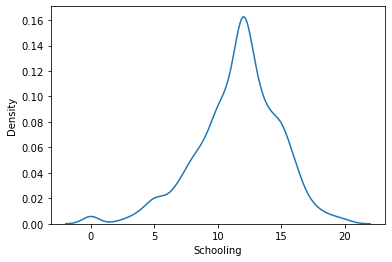

In [67]:
sns.kdeplot(df[i])

In [68]:
o,u,l=get_outlier_iqr(df['Life expectancy '])

q1=63.0 q2=72.0 q3=75.0
IQR = 12.0
upper_tail=93.0
lower_tail=48.0


In [69]:
u

93.0

In [70]:
df.loc[(df['Life expectancy ']>u) | (df['Life expectancy ']<l),'Life expectancy ']=u

In [71]:
df['Life expectancy '].unique()

array([65, 59, 58, 57, 56, 55, 54, 77, 76, 75, 74, 73, 72, 71, 52, 51, 49,
       48, 47, 46, 45, 82, 81, 86, 83, 79, 88, 84, 78, 69, 68, 67, 66, 70,
       89, 87, 80, 60, 64, 63, 62, 61, 53, 85, 36, 44, 50, 43, 42, 41, 39])

<AxesSubplot:xlabel='Life expectancy '>

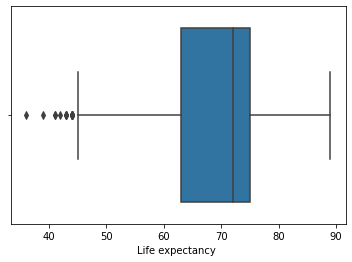

In [72]:
sns.boxplot(x=df['Life expectancy '])

In [73]:
o,u,l=get_outlier_iqr(df['Adult Mortality'])

q1=74.0 q2=144.0 q3=227.0
IQR = 153.0
upper_tail=456.5
lower_tail=-117.25


In [74]:
df.loc[(df['Adult Mortality']>u) | (df['Adult Mortality']<l),'Adult Mortality']= u

In [75]:
df['Adult Mortality'].unique()

array([263. , 271. , 268. , 272. , 275. , 279. , 281. , 287. , 295. ,
       291. , 293. ,   3. , 316. , 321. ,  74. ,   8. ,  84. ,  86. ,
        88. ,  91. ,   1. ,   9. ,  99. ,  15. ,  17. ,  18. ,  14. ,
        11. ,  19. , 112. , 113. , 116. , 119. , 123. , 126. , 129. ,
       132. , 136. , 146. , 145. , 335. , 348. , 355. , 358. , 361. ,
       365. , 369. , 371. , 375. , 381. , 382. , 386. , 388. , 391. ,
        44. ,  48. ,  13. , 131. , 133. , 134. , 138. , 142. , 144. ,
       147. , 149. , 151. , 153. , 154. , 156. , 118. ,  12. , 121. ,
       127. , 137. , 128. , 141. ,  59. ,   6. ,  61. ,  63. ,  64. ,
        66. ,  67. ,  69. ,  71. ,  73. ,  75. ,  78. ,  65. ,  68. ,
         7. ,  77. ,  76. ,  81. ,  85. ,  92. ,  96. , 125. , 162. ,
        16. , 172. , 167. , 161. , 168. , 171. , 174. , 189. , 192. ,
        79. ,  83. ,  87. , 135. , 152. , 155. , 158. , 164. , 173. ,
        98. , 111. , 115. , 117. , 196. , 199. ,  23. , 194. , 232. ,
       222. , 226. ,

<AxesSubplot:xlabel='Adult Mortality'>

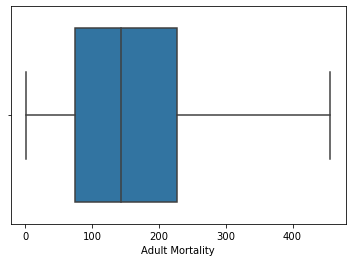

In [76]:
sns.boxplot(x=df['Adult Mortality'])

In [77]:
o,u,l=get_outlier_iqr(df['infant deaths'])
df.loc[(df['infant deaths']>u) | (df['infant deaths']<l),'infant deaths']= u
df['infant deaths'].unique()

q1=0.0 q2=3.0 q3=22.0
IQR = 22.0
upper_tail=55.0
lower_tail=-27.5


array([55,  0,  1, 21, 20, 19,  8,  9, 10, 11, 12,  5,  6,  7, 25, 13, 14,
       15,  2, 42, 44, 46, 49, 51, 54, 38, 39, 40, 41, 43, 45, 47, 48, 22,
       23, 24, 16, 17, 18, 27, 50, 53,  3,  4, 37, 26, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 52], dtype=int64)

<AxesSubplot:xlabel='infant deaths'>

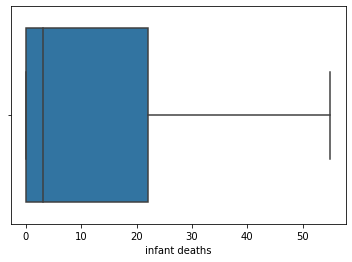

In [78]:
sns.boxplot(x=df['infant deaths'])

In [79]:
o,u,l=get_outlier_iqr(df['Alcohol'])
df.loc[(df['Alcohol']>u) | (df['Alcohol']<l),'Alcohol']= u
df['Alcohol'].unique()

q1=1.0 q2=3.0 q3=7.0
IQR = 6.0
upper_tail=16.0
lower_tail=-6.5


array([ 0,  4,  5,  3,  8,  7,  6,  2,  1,  9, 10, 12, 11, 13, 14, 16, 15])

<AxesSubplot:xlabel='Alcohol'>

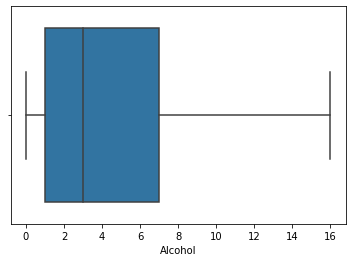

In [80]:
sns.boxplot(x=df['Alcohol'])

In [81]:
o,u,l=get_outlier_iqr(df['percentage expenditure'])
df.loc[(df['percentage expenditure']>u) | (df['percentage expenditure']<l),'percentage expenditure']= u
df['percentage expenditure'].unique()

q1=4.0 q2=64.0 q3=440.75
IQR = 436.75
upper_tail=1095.875
lower_tail=-541.9375


array([7.100000e+01, 7.300000e+01, 7.800000e+01, 7.000000e+00,
       7.900000e+01, 5.600000e+01, 2.500000e+01, 1.000000e+01,
       1.700000e+01, 1.000000e+00, 1.500000e+01, 1.100000e+01,
       1.600000e+01, 3.640000e+02, 4.280000e+02, 4.300000e+02,
       4.120000e+02, 4.370000e+02, 4.100000e+01, 3.480000e+02,
       3.600000e+01, 3.200000e+01, 3.000000e+00, 2.600000e+01,
       2.210000e+02, 1.400000e+01, 1.040000e+02, 9.600000e+01,
       9.100000e+01, 0.000000e+00, 5.400000e+01, 5.440000e+02,
       5.550000e+02, 5.090000e+02, 3.520000e+02, 4.300000e+01,
       3.200000e+02, 2.700000e+02, 2.000000e+00, 2.200000e+02,
       1.480000e+02, 1.470000e+02, 1.540000e+02, 2.300000e+01,
       3.500000e+01, 2.560000e+02, 2.390000e+02, 1.910000e+02,
       2.120000e+02, 2.490000e+02, 1.840000e+02, 9.800000e+01,
       8.000000e+00, 2.400000e+01, 3.000000e+01, 1.095875e+03,
       1.490000e+02, 1.800000e+02, 2.570000e+02, 2.160000e+02,
       2.200000e+01, 9.270000e+02, 1.630000e+02, 8.4700

<AxesSubplot:xlabel='percentage expenditure'>

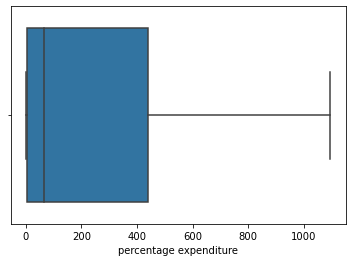

In [82]:
sns.boxplot(x=df['percentage expenditure'])

In [83]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [87]:
o,u,l=get_outlier_iqr(df['Hepatitis B'])
df.loc[(df['Hepatitis B']>u) | (df['Hepatitis B']<l),'Hepatitis B']= u
df['Hepatitis B'].unique()

q1=91.0 q2=93.0 q3=98.0
IQR = 7.0
upper_tail=108.5
lower_tail=82.25


array([108.5,  99. ,  98. ,  97. ,  96. ,  95. ,  94. ,  91. ,  83. ,
        92. ,  85. ,  84. ,  88. ,  93. ,  89. ,  86. ,  87. ])

<AxesSubplot:xlabel='Hepatitis B'>

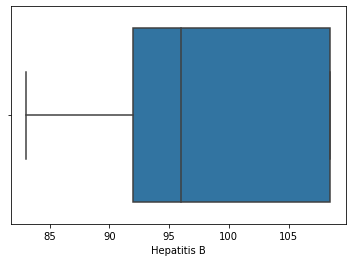

In [88]:
sns.boxplot(x=df['Hepatitis B'])

In [89]:
o,u,l=get_outlier_iqr(df['Measles '])
df.loc[(df['Measles ']>u) | (df['Measles ']<l),'Measles ']= u
df['Measles '].unique()

q1=0.0 q2=17.0 q3=360.25
IQR = 360.25
upper_tail=900.625
lower_tail=-450.3125


array([900.625, 492.   , 430.   , 466.   , 798.   ,   0.   ,   9.   ,
        28.   ,  10.   ,  22.   ,  68.   ,   6.   ,   7.   ,   8.   ,
        16.   ,  18.   , 662.   ,  63.   ,  25.   , 112.   , 103.   ,
       107.   , 217.   , 118.   , 265.   , 765.   , 258.   ,  29.   ,
         1.   ,   2.   ,   3.   ,  17.   ,  33.   ,  13.   , 137.   ,
         4.   ,  40.   ,  69.   ,  15.   ,  74.   , 340.   , 158.   ,
       199.   , 190.   ,  70.   , 104.   ,  65.   ,  11.   ,  91.   ,
        32.   , 141.   , 108.   , 309.   , 117.   ,  36.   ,  52.   ,
        49.   , 448.   ,  20.   ,  23.   ,  90.   , 164.   ,   5.   ,
       222.   , 827.   , 574.   , 210.   ,  46.   ,  12.   , 240.   ,
       289.   , 237.   , 788.   , 718.   ,  64.   ,  50.   , 149.   ,
        21.   ,  14.   ,  45.   ,  47.   ,  39.   , 109.   , 576.   ,
        98.   ,  26.   ,  61.   ,  44.   ,  83.   ,  55.   , 786.   ,
       637.   , 288.   , 426.   , 392.   , 341.   , 176.   , 262.   ,
        27.   , 756.

<AxesSubplot:xlabel='Measles '>

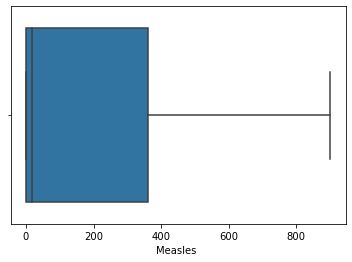

In [90]:
sns.boxplot(x=df['Measles '])

In [91]:
o,u,l=get_outlier_iqr(df[' BMI '])
df.loc[(df[' BMI ']>u) | (df[' BMI ']<l),' BMI ']= u
df[' BMI '].unique()

q1=19.0 q2=43.0 q3=56.0
IQR = 37.0
upper_tail=111.5
lower_tail=-27.25


array([19., 18., 17., 16., 15., 14., 13., 12., 58., 57., 56., 55., 54.,
       53., 52., 51.,  5., 49., 48., 47., 46., 45., 59., 44., 23., 22.,
       21.,  2., 43., 42., 41.,  4., 39., 38., 62., 61.,  6., 66., 65.,
       64., 63., 11.,  1., 25., 24., 37., 36., 35., 34., 33., 32., 31.,
        3., 29., 28., 27., 26., 67., 82., 77., 76., 75., 74., 73., 72.,
       71.,  7., 69., 68., 81., 87., 83., 79.,  9.])

<AxesSubplot:xlabel=' BMI '>

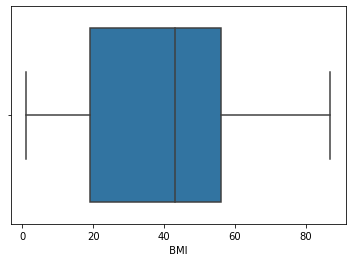

In [92]:
sns.boxplot(x=df[' BMI '])

In [93]:
o,u,l=get_outlier_iqr(df['under-five deaths '])
df.loc[(df['under-five deaths ']>u) | (df['under-five deaths ']<l),'under-five deaths ']= u
df['under-five deaths '].unique()

q1=0.0 q2=4.0 q3=28.0
IQR = 28.0
upper_tail=70.0
lower_tail=-35.0


array([70,  0,  1, 24, 23, 22, 25,  9, 10, 11, 12, 13, 14,  2,  6,  7,  8,
       39, 40, 15, 16, 17, 18, 19, 20,  3,  4, 47, 49, 52, 54, 57, 61, 64,
       68, 63, 66, 31, 32, 33, 34, 35, 36, 37, 38, 41, 21, 26, 29, 60, 62,
       65,  5, 55, 56, 58, 59, 42, 43, 44, 46, 48, 51, 53, 27, 28, 30, 45,
       50, 69], dtype=int64)

<AxesSubplot:xlabel='under-five deaths '>

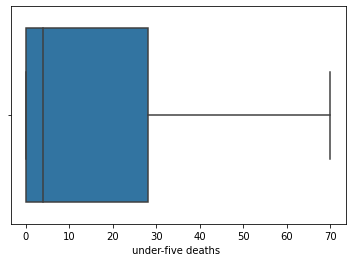

In [94]:
sns.boxplot(x=df['under-five deaths '])

In [100]:
o,u,l=get_outlier_iqr(df['Polio'])
df.loc[(df['Polio']>u) | (df['Polio']<l),'Polio']= u
df['Polio'].unique()

q1=91.0 q2=96.0 q3=99.0
IQR = 8.0
upper_tail=111.0
lower_tail=81.0


array([111.,  99.,  98.,  97.,  95.,  94.,  92.,  88.,  86.,  87.,  89.,
        81.,  96.,  93.,  91.,  85.,  83.,  84.,  82.])

<AxesSubplot:xlabel='Polio'>

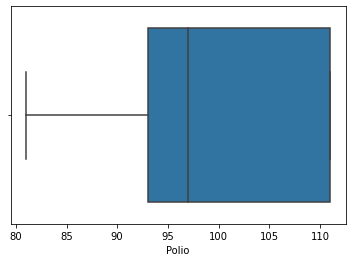

In [101]:
sns.boxplot(x=df['Polio'])

In [102]:
o,u,l=get_outlier_iqr(df['Total expenditure'])
df.loc[(df['Total expenditure']>u) | (df['Total expenditure']<l),'Total expenditure']= u
df['Total expenditure'].unique()

q1=4.0 q2=5.0 q3=7.0
IQR = 3.0
upper_tail=11.5
lower_tail=0.25


array([ 8. ,  7. ,  9. ,  6. ,  5. ,  4. ,  3. ,  2. , 11. ,  1. , 11.5])

<AxesSubplot:xlabel='Total expenditure'>

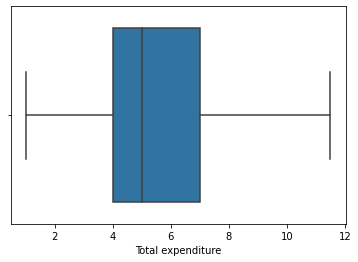

In [103]:
sns.boxplot(x=df['Total expenditure'])

In [109]:
o,u,l=get_outlier_iqr(df['Diphtheria '])
df.loc[(df['Diphtheria ']>u) | (df['Diphtheria ']<l),'Diphtheria ']= u
df['Diphtheria '].unique()

q1=91.0 q2=96.0 q3=99.0
IQR = 8.0
upper_tail=111.0
lower_tail=81.0


array([111.,  99.,  98.,  97.,  95.,  93.,  88.,  86.,  87.,  89.,  94.,
        91.,  96.,  83.,  92.,  85.,  84.,  81.,  82.])

<AxesSubplot:xlabel='Diphtheria '>

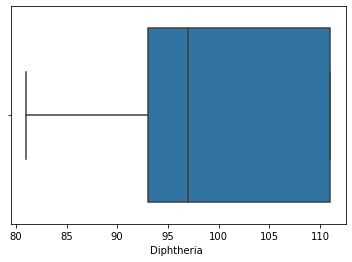

In [110]:
sns.boxplot(x=df['Diphtheria '])

In [111]:
o,u,l=get_outlier_iqr(df['GDP'])
df.loc[(df['GDP']>u) | (df['GDP']<l),'GDP']= u
df['GDP'].unique()

q1=579.75 q2=1766.0 q3=4779.0
IQR = 4199.25
upper_tail=11077.875
lower_tail=-4669.3125


array([584., 612., 631., ..., 453.,  57., 548.])

<AxesSubplot:xlabel='GDP'>

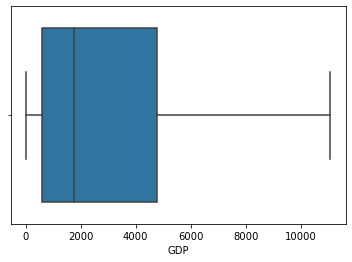

In [112]:
sns.boxplot(x=df['GDP'])

In [113]:
o,u,l=get_outlier_iqr(df['Population'])
df.loc[(df['Population']>u) | (df['Population']<l),'Population']= u
df['Population'].unique()

q1=418917.25 q2=1386542.0 q3=4584371.25
IQR = 4165454.0
upper_tail=10832552.25
lower_tail=-4787900.25


array([10832552.25,   327582.  ,  3696958.  , ...,  1332999.  ,
         129432.  ,   125525.  ])

<AxesSubplot:xlabel='Population'>

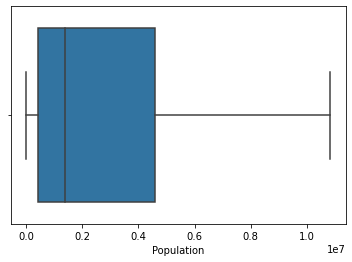

In [114]:
sns.boxplot(x=df['Population'])

In [115]:
o,u,l=get_outlier_iqr(df[' thinness  1-19 years'])
df.loc[(df[' thinness  1-19 years']>u) | (df[' thinness  1-19 years']<l),' thinness  1-19 years']= u
df[' thinness  1-19 years'].unique()

q1=1.0 q2=3.0 q3=7.0
IQR = 6.0
upper_tail=16.0
lower_tail=-6.5


array([16,  2,  1,  6,  5,  8,  9,  3,  0,  4,  7, 15, 11, 12, 13, 14])

<AxesSubplot:xlabel=' thinness  1-19 years'>

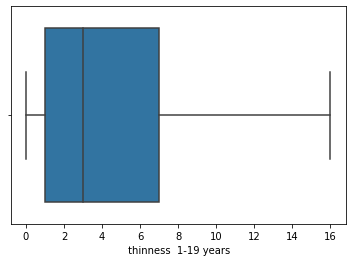

In [116]:
sns.boxplot(x=df[' thinness  1-19 years'])

In [117]:
o,u,l=get_outlier_iqr(df[' thinness 5-9 years'])
df.loc[(df[' thinness 5-9 years']>u) | (df[' thinness 5-9 years']<l),' thinness 5-9 years']= u
df[' thinness 5-9 years'].unique()

q1=1.0 q2=3.0 q3=7.0
IQR = 6.0
upper_tail=16.0
lower_tail=-6.5


array([16,  2,  1,  5,  6,  8,  9,  3,  0,  4,  7, 11, 12, 13, 14, 15])

<AxesSubplot:xlabel=' thinness 5-9 years'>

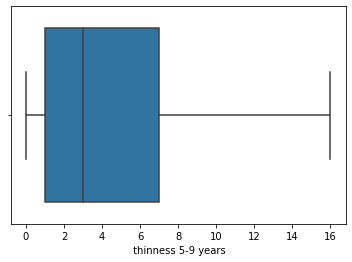

In [118]:
sns.boxplot(x=df[' thinness 5-9 years'])

In [119]:
o,u,l=get_outlier_iqr(df['Schooling'])
df.loc[(df['Schooling']>u) | (df['Schooling']<l),'Schooling']= u
df['Schooling'].unique()

q1=10.0 q2=12.0 q3=14.0
IQR = 4.0
upper_tail=20.0
lower_tail=5.0


array([10,  9,  8,  7,  6,  5, 14, 13, 12, 11, 20, 17, 16, 15, 19, 18])

<AxesSubplot:xlabel='Schooling'>

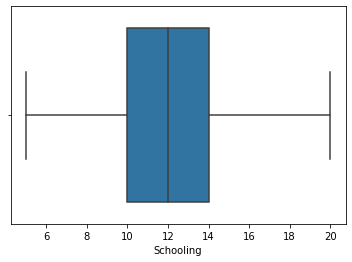

In [120]:
sns.boxplot(x=df['Schooling'])

In [121]:
x=df.drop(['Life expectancy ','Country','Year','Income composition of resources'],axis=1)
y=df['Life expectancy ']
x.shape,y.shape

((2938, 18), (2938,))

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=7)

In [123]:
m1=LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [124]:
m1_eval(m1,x_train,y_train)
print("------------------------------------")
m1_eval(m1,x_test,y_test)

MSE = 
 44.16954922413081
RMSE = 
 6.646017546179879
MAE = 
4.1479951387893035
R-Squared Value = 
 0.502072496868909
ADJUSTED R - SQUARED VALUE =
 0.49767254838763275
------------------------------------
MSE = 
 50.93274049579862
RMSE = 
 7.136717767699562
MAE = 
4.550707909646496
R-Squared Value = 
 0.4534012318654079
ADJUSTED R - SQUARED VALUE =
 0.4420005623098776


'Success'

In [ ]:
## Bias and variance Trade off 

Bias >> low/ Bias 
Variance >> low variance 

Generelaised / best model

In [125]:
m1

LinearRegression()

In [127]:
with open('linear_model.pkl','wb') as file: 
    pickle.dump(m1,file)

In [134]:
"""'Status','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
' thinness  1-19 years', ' thinness 5-9 years', 'Schooling'"""

data = x

Life_expectancy = m1.predict(data)
print(Life_expectancy)

[59.57939423 57.45488737 58.71226283 ... 80.08752859 72.44383319
 71.47658996]


In [139]:
columns = {"Column Names":x.columns.tolist()}

with open('columns_names.json','w') as file: 
    json.dump(columns,file)

In [140]:
encoded_data = {'Status' : {"Developing":0,"Developed":1}}

In [141]:
with open('encoded_data.json','w') as file: 
    json.dump(encoded_data,file)